# Twitter Sentiment Analysis 



# Dataset Description

- The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text.Each line of the file is a data record. Each record consists of one or more fields, separated by commas. 
- Formally, given a training sample of tweets and labels, where label ‘4’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist,our objective is to predict the labels on the given test dataset.

## Importing the necessary packages 

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns; sns.set()
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

##  Dataset used for our analysis

In [2]:
#cols = ['sentiment','id','date','query_string','user','tweet']
# df = pd.read_csv("C:/Users/nares/OneDrive/Desktop/Twitter Sentiment Analysis/train.csv")
DATASET_COLUMNS=['target','ids','date','query','user','text']
DATASET_ENCODING = "ISO-8859-1"
df=pd.read_csv("C:/Users/nares/OneDrive/Desktop/Twitter Sentiment analysis/Twitter_dataset.csv", \
                 encoding=DATASET_ENCODING, names=DATASET_COLUMNS)


#### Here we see that there are following tweets in the training dataset

In [3]:
df.shape

(1600000, 6)

In [4]:
df.head(12)

,target,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
df.drop(['ids','date','query','user'],inplace=True,axis=1)

In [6]:
df.head(12)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [7]:
df["target"]=df["target"].replace(4,1)

In [8]:
df.target.value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [9]:
data=df[['text','target']]
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [10]:
data_negative = data[data['target']==0]
data_positive = data[data['target']==1]


# Data Pre-Processing

In [11]:
neg_slice=data_negative.iloc[0:30000]
pos_slice=data_positive.iloc[0:30000]
df=pd.concat([neg_slice,pos_slice])
df

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
829995,"Really wants to go and see 17 again, because Z...",1
829996,@krissa22 Thank you!,1
829997,dreaming of you,1
829998,@TheEllenShow I saw a clip online! good show!,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 829999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60000 non-null  object
 1   target  60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [13]:
# assuming your DataFrame is called df
df = df.rename(columns={'text': 'tweet', 'target': 'label'})

In [14]:
df.head()
df.shape

(60000, 2)

## Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [15]:

    def clean_text(text):
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('http?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub(r'\b\w{1,3}\b', '', text)
        return text
        

In [16]:
df['clean_Tweets']=df['tweet'].apply(clean_text)

In [17]:
df.head()

,tweet,label,clean_Tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot Awww thats bummer shoulda Dav...
1,is upset that he can't update his Facebook by ...,0,upset that cant update Facebook texting ...
2,@Kenichan I dived many times for the ball. Man...,0,Kenichan dived many times ball Managed sav...
3,my whole body feels itchy and like its on fire,0,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass behaving here becaus...


 ## Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [22]:
tokenized_tweet = df['clean_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [switchfoot, Awww, thats, bummer, shoulda, Dav...
1    [upset, that, cant, update, Facebook, texting,...
2    [Kenichan, dived, many, times, ball, Managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, behaving, here, because, can...
Name: clean_Tweets, dtype: object

## Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

In [24]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [switchfoot, awww, that, bummer, shoulda, davi...
1    [upset, that, cant, updat, facebook, text, mig...
2    [kenichan, dive, mani, time, ball, manag, save...
3               [whole, bodi, feel, itchi, like, fire]
4    [nationwideclass, behav, here, becaus, cant, o...
Name: clean_Tweets, dtype: object

#### Now let’s stitch these tokens back together.

In [25]:
stitched_tweet = tokenized_tweet.apply(lambda x: ' '.join(x))
df['clean_Tweets']=stitched_tweet
df.head()

,tweet,label,clean_Tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,switchfoot awww that bummer shoulda david carr...
1,is upset that he can't update his Facebook by ...,0,upset that cant updat facebook text might resu...
2,@Kenichan I dived many times for the ball. Man...,0,kenichan dive mani time ball manag save rest b...
3,my whole body feels itchy and like its on fire,0,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",0,nationwideclass behav here becaus cant over there


# Extracting Features from cleaned Tweets

### Bag-of-Words Features

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['clean_Tweets'])
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Features

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(df['clean_Tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Classifiaction Techniques

### Using the features from Bag-of-Words Model for training set

In [34]:
train_bow = bow[:60000]
train_bow.todense()
print(train_bow)

  (0, 59)	1
  (0, 854)	1
  (0, 117)	1
  (1, 854)	1
  (1, 917)	1
  (1, 130)	1
  (1, 915)	1
  (1, 297)	1
  (1, 851)	1
  (1, 542)	1
  (1, 693)	1
  (1, 719)	1
  (1, 879)	1
  (1, 28)	1
  (1, 89)	1
  (2, 527)	1
  (2, 876)	1
  (2, 64)	1
  (2, 526)	1
  (2, 714)	1
  (2, 692)	1
  (3, 962)	1
  (3, 96)	1
  (3, 309)	1
  (3, 496)	1
  :	:
  (59993, 398)	1
  (59993, 727)	1
  (59993, 943)	1
  (59993, 374)	1
  (59994, 608)	1
  (59994, 464)	1
  (59994, 939)	1
  (59994, 561)	1
  (59994, 365)	1
  (59994, 22)	1
  (59994, 864)	1
  (59994, 951)	1
  (59994, 780)	1
  (59994, 654)	1
  (59994, 210)	1
  (59995, 72)	1
  (59995, 683)	1
  (59995, 934)	1
  (59995, 11)	1
  (59996, 853)	1
  (59997, 245)	1
  (59998, 370)	1
  (59998, 601)	1
  (59998, 755)	1
  (59999, 980)	1


### Using features from TF-IDF for training set

In [35]:
train_tfidf_matrix = tfidf_matrix[:60000]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into training and validation set

In [36]:
from sklearn.model_selection import train_test_split

#### Bag-of-Words Features

In [38]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,df['label'],test_size=0.3,random_state=2)

#### Using TF-IDF features

In [39]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,df['label'],test_size=0.3,random_state=17)

# 1.Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#### For BOW

In [41]:
y_pred = gnb.fit(x_train_bow.toarray(), y_train_bow).predict(x_valid_bow.toarray())
a1=accuracy_score(y_valid_bow,y_pred)
print("Accuracy =%f"%(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)

Accuracy =0.674222


array([[5062, 3979],
       [1885, 7074]], dtype=int64)

#### For TFIDF

In [42]:
y_pred = gnb.fit(x_train_tfidf.toarray(), y_train_bow).predict(x_valid_tfidf.toarray())
b1=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy =%f"%(accuracy_score(y_valid_tfidf,y_pred)))
confusion_matrix(y_valid_tfidf,y_pred)

Accuracy =0.513500


array([[3978, 4973],
       [3784, 5265]], dtype=int64)

# 2.KNN Classification

In [43]:
from sklearn.neighbors import KNeighborsClassifier


In [134]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")



#### For BOW

In [135]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_bow.toarray(), y_train_bow)
y_pred=neigh.predict(x_valid_bow)
a2=accuracy_score(y_valid_bow,y_pred)
print("Accuracy =%f"%(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)

Accuracy =0.644556


array([[4921, 4120],
       [2278, 6681]], dtype=int64)

#### For TFIDF

In [136]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_tfidf.toarray(), y_train_tfidf)
y_pred=neigh.predict(x_valid_tfidf)
b2=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy =%f"%(accuracy_score(y_valid_tfidf,y_pred)))

Accuracy =0.629000


# 3.Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

#### For Bow

In [47]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train_bow.toarray(), y_train_bow)
y_pred=clf.predict(x_valid_bow)
a3=accuracy_score(y_valid_bow,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)

Accuracy score is :0.7202


array([[6561, 2480],
       [2557, 6402]], dtype=int64)

#### For TFIDF

In [48]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train_tfidf.toarray(), y_train_tfidf)
y_pred=clf.predict(x_valid_tfidf)
b3=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_tfidf,y_pred)))

Accuracy score is :0.7106



## 5.Decision Tree From Information Gain

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [52]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [53]:
dct.fit(x_train_bow,y_train_bow)
y_pred = dct.predict(x_valid_bow)
a5=accuracy_score(y_valid_bow,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)

Accuracy score is :0.6733


array([[6105, 2936],
       [2944, 6015]], dtype=int64)

### Using TF-IDF Features

In [54]:
dct.fit(x_train_tfidf,y_train_tfidf)
y_pred = dct.predict(x_valid_tfidf)
b5=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_tfidf,y_pred)))


Accuracy score is :0.6686


# 6.Decision Tree using Gini Index

In [55]:
dct = DecisionTreeClassifier(criterion='gini', random_state=1)

### Using Bag-of-Words Features

In [56]:
dct.fit(x_train_bow,y_train_bow)
y_pred = dct.predict(x_valid_bow)
a6=accuracy_score(y_valid_bow,y_pred)

print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_bow,y_pred)))
confusion_matrix(y_valid_bow,y_pred)

Accuracy score is :0.6696


array([[6070, 2971],
       [2977, 5982]], dtype=int64)

### Using TF-IDF Features

In [57]:
dct.fit(x_train_tfidf,y_train_tfidf)
y_pred = dct.predict(x_valid_tfidf)
b6=accuracy_score(y_valid_tfidf,y_pred)
print("Accuracy score is :{0:0.4f}".format(accuracy_score(y_valid_tfidf,y_pred)))

Accuracy score is :0.6734


# CNN

In [119]:
num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(df['clean_Tweets'].tolist())

print(str(tokenizer.texts_to_sequences(['Hello how are you'])))

   


[[313, 520, 5590, 3933]]


In [87]:
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(df['clean_Tweets'].tolist(),\
                                                      df['label'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = df['label'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))


x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )

x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)

print(x_train[0])

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))


Train data len:54000
Class distributionCounter({1: 27000, 0: 27000})
Valid data len:6000
Class distributionCounter({1: 3000, 0: 3000})
[   1  172  162  329  398   22   22   26   83    2   82 3635    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


C:\Users\nares\AppData\Local\Temp\ipykernel_26036\2868006453.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train) )
C:\Users\nares\AppData\Local\Temp\ipykernel_26036\2868006453.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )


In [113]:
max_features =20000
embedding_dim =64
sequence_length = 40

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               


model.add(tf.keras.layers.GlobalMaxPooling1D())
 
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
                               



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["Accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 64)            1280064   
                                                                 
 conv1d_5 (Conv1D)           (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,305,026
Trainable params: 1,305,026
Non-trainable params: 0
____________________________________________

In [114]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(40,), dtype=tf.int32, name=None), TensorSpec(shape=(2,), dtype=tf.float32, name=None))>

In [115]:
epochs = 10
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1 )




Epoch 1/10


C:\Users\nares\anaconda3\lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


422/422 [==============================] - 9s 19ms/step - loss: 0.6305 - Accuracy: 0.7212 - val_loss: 0.5585 - val_Accuracy: 0.7573
Epoch 2/10
422/422 [==============================] - 8s 19ms/step - loss: 0.5578 - Accuracy: 0.7624 - val_loss: 0.5556 - val_Accuracy: 0.7602
Epoch 3/10
422/422 [==============================] - 8s 19ms/step - loss: 0.5494 - Accuracy: 0.7699 - val_loss: 0.5585 - val_Accuracy: 0.7605
Epoch 4/10
422/422 [==============================] - 8s 19ms/step - loss: 0.5448 - Accuracy: 0.7759 - val_loss: 0.5602 - val_Accuracy: 0.7602
Epoch 5/10
422/422 [==============================] - 8s 19ms/step - loss: 0.5404 - Accuracy: 0.7823 - val_loss: 0.5633 - val_Accuracy: 0.7647
Epoch 6/10
422/422 [==============================] - 8s 20ms/step - loss: 0.5365 - Accuracy: 0.7880 - val_loss: 0.5681 - val_Accuracy: 0.7610
Epoch 7/10
422/422 [==============================] - 8s 19ms/step - loss: 0.5310 - Accuracy: 0.7931 - val_loss: 0.5735 - val_Accuracy: 0.7627
Epoch 8/10

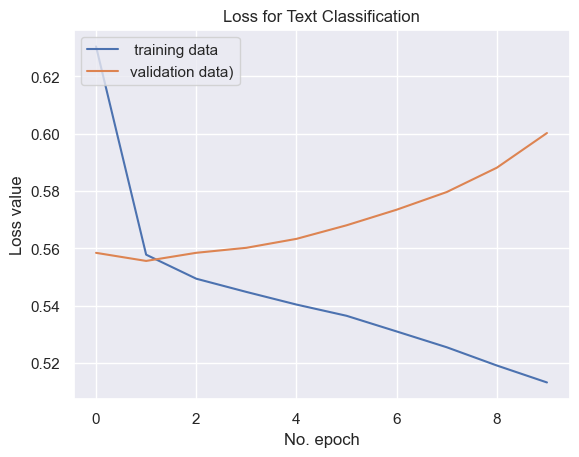

In [116]:

plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [123]:
test_loss, test_acc = model.evaluate(valid_ds.batch(128), verbose=2)
a7=test_acc
print('Accuracy:', test_acc*100)


47/47 - 0s - loss: 0.6003 - Accuracy: 0.7588 - 393ms/epoch - 8ms/step
Accuracy: 75.88333487510681


47/47 [==============================] - 0s 3ms/step


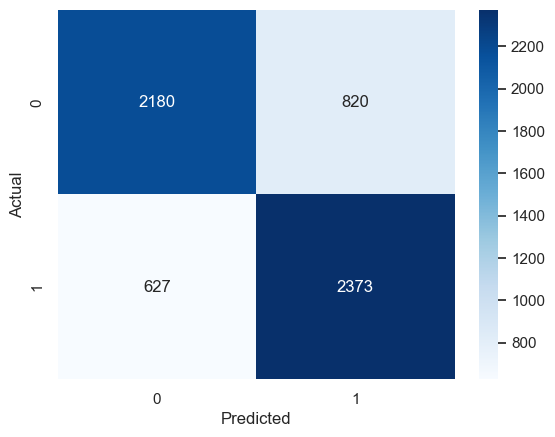

In [139]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generate predictions on the test data
y_pred = model.predict(valid_ds.batch(128))
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [125]:

# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model.predict(x_valid)
print(predictions)
predict_results = predictions.argmax(axis=1)


Generate predictions for all samples
188/188 [==============================] - 1s 4ms/step
[[0.5873582  0.41238785]
 [0.21566318 0.77711564]
 [0.52100956 0.47758213]
 ...
 [0.14428587 0.85242736]
 [0.6385761  0.3591167 ]
 [0.25093096 0.7408819 ]]


# Model Comparison

In [126]:
Algo=['Naive Bayes(Bag-of-Words)','Naive Bayes(TF-IDF)','KNN(Bag-of-Words)','KNN(TF-IDF)','Random Forest(Bag-of-Words)','Random Forest(TF-IDF)','Decision Tree(Gain)(Bag-of-Words)','Decision Tree(Gain)(TF-IDF)','Decision Tree(Gini)(Bag-of-Words)','Decision Tree(Gini)(TF-IDF)','CNN']

In [133]:
score = [a1,b1,a2,b2,a3,b3,a5,b5,a6,b6,a7]

compare=pd.DataFrame({'Model':Algo,'Accuracy':score},index=[i for i in range(1,12)])

In [128]:
compare.T

,1,2,3,4,5,6,7,8,9,10,11
Model,Naive Bayes(Bag-of-Words),Naive Bayes(TF-IDF),KNN(Bag-of-Words),KNN(TF-IDF),Random Forest(Bag-of-Words),Random Forest(TF-IDF),Decision Tree(Gain)(Bag-of-Words),Decision Tree(Gain)(TF-IDF),Decision Tree(Gini)(Bag-of-Words),Decision Tree(Gini)(TF-IDF),CNN
Accuracy,0.674222,0.5135,0.644556,0.629,0.720167,0.710556,0.673333,0.668611,0.669556,0.673444,0.758833


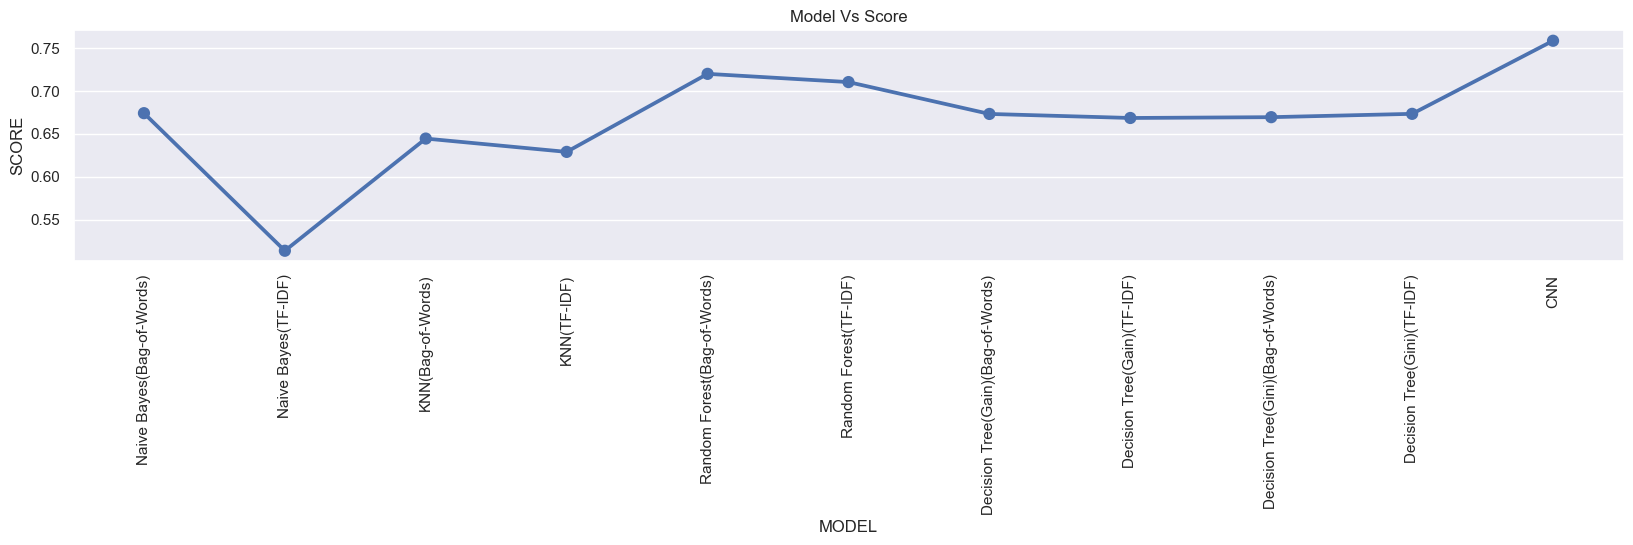

In [129]:
plt.figure(figsize=(20,3))
sns.pointplot(x='Model',y='Accuracy',data=compare)
plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.xticks(rotation =90)
plt.ylabel('SCORE')

plt.show()